# Radiosonde Module RASOTOOLS

University of Vienna  
[Institut for Meteorologie and Geophysics](http://img.univie.ac.at)


Author: M. Blaschek  
Date: 8.10.2018

In [1]:
import sys
sys.path.append('..') # if run from the doc directory

## Importing

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import rasotools as rt

## Configuration

In [3]:
# Show config informations
rt.config

homedir    : <str (/home/mblaschek)>
wkdir      : <str (/home/mblaschek/ucloud/workspace/rasotools/doc)>
igradir    : <str ()>
marsdir    : <str ()>
outdir     : <str (/home/mblaschek/ucloud/workspace/rasotools/doc/results)>
rasodir    : <str (/home/mblaschek/ucloud/workspace/rasotools/doc/raso_archive)>
std_plevels : <list ([1000.0, 2000.0, 3000.0, 5000.0, 7000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 40000.0, 50000.0, 70000.0, 85000.0, 92500.0, 100000.0])>
era_plevels : <list ([1000.0, 2000.0, 3000.0, 5000.0, 7000.0, 10000.0, 12500.0, 15000.0, 17500.0, 20000.0, 22500.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0, 55000.0, 60000.0, 65000.0, 70000.0, 75000.0, 77500.0, 80000.0, 82500.0, 85000.0, 87500.0, 90000.0, 92500.0, 95000.0, 97500.0, 100000.0])>
rttov_profile_limits : <NoneType (None)>
month_to_season : <dict ({1: 'DJF', 2: 'DJF', 3: 'MAM', 4: 'MAM', 5: 'MAM', 6: 'JJA', 7: 'JJA', 8: 'JJA', 9: 'SON', 10: 'SON', 11: 'SON', 12: 'DJF'})>
libinfo    : <str (RT(0.1) NP(

In [4]:
# Write Config to JSON file
rt.dump_config('test.json')

Configuration written:  test.json


In [5]:
# Load Config from JSON file
rt.load_config('test.json')

Configuration loaded:  test.json


In [6]:
# That's how it looks:
# Can be easily edited and adjusted to your local system
with open('test.json') as f:
    print("".join(f.read()))

{
"homedir": "/home/mblaschek",
"wkdir": "/home/mblaschek/ucloud/workspace/rasotools/doc",
"igradir": "",
"marsdir": "",
"outdir": "/home/mblaschek/ucloud/workspace/rasotools/doc/results",
"rasodir": "/home/mblaschek/ucloud/workspace/rasotools/doc/raso_archive",
"std_plevels": [
1000.0,
2000.0,
3000.0,
5000.0,
7000.0,
10000.0,
15000.0,
20000.0,
25000.0,
30000.0,
40000.0,
50000.0,
70000.0,
85000.0,
92500.0,
100000.0
],
"era_plevels": [
1000.0,
2000.0,
3000.0,
5000.0,
7000.0,
10000.0,
12500.0,
15000.0,
17500.0,
20000.0,
22500.0,
25000.0,
30000.0,
35000.0,
40000.0,
45000.0,
50000.0,
55000.0,
60000.0,
65000.0,
70000.0,
75000.0,
77500.0,
80000.0,
82500.0,
85000.0,
87500.0,
90000.0,
92500.0,
95000.0,
97500.0,
100000.0
],
"rttov_profile_limits": null,
"month_to_season": {
"1": "DJF",
"2": "DJF",
"3": "MAM",
"4": "MAM",
"5": "MAM",
"6": "JJA",
"7": "JJA",
"8": "JJA",
"9": "SON",
"10": "SON",
"11": "SON",
"12": "DJF"
},
"libinfo": "RT(0.1) NP(1.13.3) PD(0.23.0) XR(0.10.8)"
}


# Reading Example Radiosonde Data

Source: IGRAv2 from NOAA

In [7]:
# Example IGRAv2 Sounding File for Vienna
data = rt.io.open_igra('011035', filename='AUM00011035-data.txt.gz', save=False)
isonde = rt.Radiosonde('011035', data={'IGRA': data})

## Radiosonde Class

In [8]:
isonde

Radiosonde (011035)
Data: 
IGRA       : <Dataset (9 vars [date(321), pres(32)])>

In [9]:
# Data is stored in Netcdf and read with XARRAY
isonde.data

IGRA       : <Dataset (9 vars [date(321), pres(32)])>

## IGRA Radiosonde data

Notice that IGRA sounding data has 32 level.  
These levels are interpolated to the lower 32 ERA-Interim pressure levels

In [10]:
# XARRAY
isonde.data.IGRA

<xarray.Dataset>
Dimensions:  (date: 321, pres: 32)
Coordinates:
  * date     (date) datetime64[ns] 2015-01-23T12:00:00 2015-01-24 ...
  * pres     (pres) float64 1e+03 2e+03 3e+03 5e+03 7e+03 1e+04 1.25e+04 ...
Data variables:
    gph      (date, pres) float64 3.059e+04 2.622e+04 2.369e+04 2.045e+04 ...
    temp     (date, pres) float64 218.0 213.2 215.4 217.4 218.2 219.0 219.9 ...
    rhumi    (date, pres) float64 nan nan nan nan nan nan nan nan nan nan ...
    dpd      (date, pres) float64 25.0 23.0 24.0 24.0 25.0 25.0 25.55 26.0 ...
    windd    (date, pres) float64 235.0 240.0 215.0 300.0 260.0 285.0 253.7 ...
    winds    (date, pres) float64 15.0 8.0 7.0 6.0 5.0 4.0 7.747 4.0 5.902 ...
    numlev   (date) int64 123 104 104 81 88 99 108 105 101 89 94 93 86 96 90 ...
    lat      (date) float64 48.23 48.23 48.23 48.23 48.23 48.23 48.23 48.23 ...
    lon      (date) float64 16.35 16.35 16.35 16.35 16.35 16.35 16.35 16.35 ...
Attributes:
    ident:      011035
    source:     NOAA N

### Read Raw ASCII Tables into Python

Simply reading the ASCII file and splitting data and header informations

In [11]:
rawdata, headerinfo = rt.io.igra.read_ascii('011035', filename='AUM00011035-data.txt.gz')

In [12]:
# Associated Information per souding
# Sounding at 2015-01-23 12:00:00 has 123 levels
headerinfo.head()

,numlev,lat,lon
date,,,
2015-01-23 12:00:00,123,48.2333,16.35
2015-01-24 00:00:00,104,48.2333,16.35
2015-01-24 12:00:00,104,48.2333,16.35
2015-01-25 00:00:00,81,48.2333,16.35
2015-01-25 12:00:00,88,48.2333,16.35


In [13]:
# Raw IGRA Data as Pandas Table
# first 123 entries in the raw data table
rawdata.head(123)

,pres,gph,temp,rhumi,dpd,windd,winds
date,,,,,,,
2015-01-23 12:00:00,99200,NaN,276.95,NaN,2.2,300.0,5.0
2015-01-23 12:00:00,97700,NaN,NaN,NaN,NaN,300.0,11.0
2015-01-23 12:00:00,95800,NaN,NaN,NaN,NaN,315.0,13.0
2015-01-23 12:00:00,94700,NaN,273.95,NaN,0.2,NaN,NaN
2015-01-23 12:00:00,92500,763.0,273.75,NaN,0.2,340.0,12.0
2015-01-23 12:00:00,89500,NaN,NaN,NaN,NaN,10.0,10.0
2015-01-23 12:00:00,88600,NaN,273.55,NaN,0.2,NaN,NaN
2015-01-23 12:00:00,85000,1441.0,271.65,NaN,0.2,20.0,10.0
2015-01-23 12:00:00,81100,NaN,NaN,NaN,NaN,35.0,10.0


In [14]:
help(rt.io.igra.to_xarray)

Help on function to_xarray in module rasotools.io.igra:

to_xarray(ident, filename=None, save=True, levels=None, force=False, **kwargs)
    Read IGRAv2 Data and interpolate to standard pressure levels
    
    Parameters
    ----------
    ident : str
        Radiosonde ID
    filename : str
        filename to read
    save : bool
        Save Xarray temporary data ?
    levels : list
        pressure levels to interpolate to
    force : bool
        read from ascii ?
    kwargs : dict
        optional keyword arguments
    
    Returns
    -------
    Dataset
        Dataset, Xarray of sounding



In [15]:
xdata = rt.io.igra.to_xarray('011035',filename='AUM00011035-data.txt.gz', save=False)

In [16]:
xdata

<xarray.Dataset>
Dimensions:  (date: 321, pres: 32)
Coordinates:
  * date     (date) datetime64[ns] 2015-01-23T12:00:00 2015-01-24 ...
  * pres     (pres) float64 1e+03 2e+03 3e+03 5e+03 7e+03 1e+04 1.25e+04 ...
Data variables:
    gph      (date, pres) float64 3.059e+04 2.622e+04 2.369e+04 2.045e+04 ...
    temp     (date, pres) float64 218.0 213.2 215.4 217.4 218.2 219.0 219.9 ...
    rhumi    (date, pres) float64 nan nan nan nan nan nan nan nan nan nan ...
    dpd      (date, pres) float64 25.0 23.0 24.0 24.0 25.0 25.0 25.55 26.0 ...
    windd    (date, pres) float64 235.0 240.0 215.0 300.0 260.0 285.0 253.7 ...
    winds    (date, pres) float64 15.0 8.0 7.0 6.0 5.0 4.0 7.747 4.0 5.902 ...
    numlev   (date) int64 123 104 104 81 88 99 108 105 101 89 94 93 86 96 90 ...
    lat      (date) float64 48.23 48.23 48.23 48.23 48.23 48.23 48.23 48.23 ...
    lon      (date) float64 16.35 16.35 16.35 16.35 16.35 16.35 16.35 16.35 ...
Attributes:
    ident:      011035
    source:     NOAA N

40 60 0 30 15.0 6.0 4.0


/opt/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/opt/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


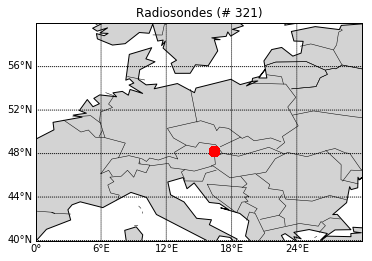

In [29]:
rt.plot.maps.points(xdata.lon.values, xdata.lat.values, maplimits=(40,60,0,30), drawcountries=True, markersize=100)